# USGS Earthquake Analysis

## by Justin Sierchio

In this analysis, we will be looking at earthquake measurements collected by the US Geological Survey from 1965 to 2016:

<ul>
    <li>Where have earthquakes occurred the most?</li>
    <li>Has the severity of the earthquakes changed over time?</li>
    <li>What are some other conclusions we might able to draw from this analysis?</li>
</ul>

This data is in .csv file format and is from Kaggle at: https://www.kaggle.com/usgs/earthquake-database/download. More information related to the dataset can be found at: https://www.kaggle.com/usgs/earthquake-database.

## Notebook Initialization

In [1]:
# Import Relevant Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import datetime

print('Initial libraries loaded into workspace!')

Initial libraries loaded into workspace!


In [2]:
# Upload Datasets for Study
df_QUAKE = pd.read_csv("quake.csv");

print('Datasets uploaded!');

Datasets uploaded!


In [3]:
# Display 1st 5 rows from USGS dataset
df_QUAKE.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


Specifically, here is what each of the data columns represent.

<ul>
    <li>Date = date of the earthquake</li>
    <li>Time = time of the earthquake</li>
    <li>Latitude = self-explanatory</li>
    <li> Longtiude = self-explanatory</li>
    <li> Type = type of event</li>
    <li> Depth = the depth underground the event occurred</li>
    <li> Depth error = self-explanatory</li>
    <li> Dept seismic stations = how many stations reported the event </li>
    <li> Magnitude = severity on the Richter scale </li>
    <li> Magnitude type = local or surface wave magnitude</li>
    <li> Magnitude error = self-explanatory</li>
    <li> Magnitude seismic stations = how many stations reported the seismic event</li>
    <li> Azimuthal Gap</li>
    <li> Horizonal distance</li>
    <li> Horizontal error = self-explanatory</li>
    <li> Root Mean square = self-explanatory</li>
    <li> ID = catalogued ID for event</li>
    <li> Source = where data came from</li>
    <li> Location source = where the seismic event first identified</li>
    <li> Magnitude source = self-explanatory</li>
    <li> Status = current status of site</li>
</ul>

# Data Cleaning

Let's now see if we need to clean this dataset.

In [4]:
# Show data types for dataset
df_QUAKE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

To begin, we will want to convert the dates into years, months, and hours for future analysis.

Now we see that there is significant missing data under 'Depth Error', 'Depth Seismic Stations', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error' and 'Root Mean Square.' Since in each of these cases, the empty rate is at least 25% (and in some cases more tha 90%), we will drop these columns from the dataset altogether.

In [5]:
# Drop columns with significant missing data from the USGS dataset
df_QUAKE2 = df_QUAKE.drop(['Depth Error', 'Depth Seismic Stations', 'Magnitude Error', 'Magnitude Seismic Stations', 
              'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square'], axis = 1)

# Display 1st 5 rows of modified USGS dataset
df_QUAKE2.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,MW,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,MW,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,MW,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


Now we see that we have 3 rows in the USGS dataset under 'Magnitude Type' that are unaccounted for, so we will explore and clean those as needed.

In [6]:
# Find the possible values for 'Magnitude Type' for the USGS dataset
df_QUAKE2['Magnitude Type'].unique()

array(['MW', 'ML', 'MH', 'MS', 'MB', 'MWC', 'MD', nan, 'MWB', 'MWW',
       'MWR'], dtype=object)

We see that we have values of 'nan'. We will convert those to 'Blank'.

In [7]:
# Convert 'nan' to 'Blank' for Magnitude Type in USGS dataset
df_QUAKE2['Magnitude Type'].fillna('Blank', inplace = True)

# Redisplay possible values for 'Magnitude Type' for the USGS dataset
df_QUAKE2['Magnitude Type'].unique()

array(['MW', 'ML', 'MH', 'MS', 'MB', 'MWC', 'MD', 'Blank', 'MWB', 'MWW',
       'MWR'], dtype=object)

And now we see the 'nan' values have been changed.

There are 3 rows that have corrupted data values and we will remove them here.

In [8]:
# Remove corrupted data values (rows) from USGS dataset
df_QUAKE3 = df_QUAKE2.drop(df_QUAKE.index[[3378,7512,20650]])

# Display data types and rows/columns again
df_QUAKE3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23409 entries, 0 to 23411
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              23409 non-null  object 
 1   Time              23409 non-null  object 
 2   Latitude          23409 non-null  float64
 3   Longitude         23409 non-null  float64
 4   Type              23409 non-null  object 
 5   Depth             23409 non-null  float64
 6   Magnitude         23409 non-null  float64
 7   Magnitude Type    23409 non-null  object 
 8   ID                23409 non-null  object 
 9   Source            23409 non-null  object 
 10  Location Source   23409 non-null  object 
 11  Magnitude Source  23409 non-null  object 
 12  Status            23409 non-null  object 
dtypes: float64(4), object(9)
memory usage: 2.5+ MB


In order to do a time analysis, we need to convert the 'Date' column into something more manageable.

In [9]:
# Convert 'Date' column using the datetime module
df_QUAKE3['date'] = pd.to_datetime(df_QUAKE3['Date'], format='%M/%d/%Y')
df_QUAKE3['time'] = pd.to_datetime(df_QUAKE3['Time'], format='%H:%M:%S')
df_QUAKE4 = df_QUAKE3.drop(['Date', 'Time'], axis = 1)

# Display the 1st 5 rows of the USGS dataset
df_QUAKE4.head()

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status,date,time
0,19.246,145.616,Earthquake,131.6,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-02 00:01:00,1900-01-01 13:44:18
1,1.863,127.352,Earthquake,80.0,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-04 00:01:00,1900-01-01 11:29:49
2,-20.579,-173.972,Earthquake,20.0,6.2,MW,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-05 00:01:00,1900-01-01 18:05:58
3,-59.076,-23.557,Earthquake,15.0,5.8,MW,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-08 00:01:00,1900-01-01 18:49:43
4,11.938,126.427,Earthquake,15.0,5.8,MW,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-09 00:01:00,1900-01-01 13:32:50


Now we will add columns for the Event Year, Event Month, Event Day and Event Hour.

In [10]:
# Create columns for Event Year, Event Month, Event Day and Event Hour
df_QUAKE4['Event Year'] = df_QUAKE4['date'].dt.year
df_QUAKE4['Event Month'] = df_QUAKE4['date'].dt.month
df_QUAKE4['Event Day'] = df_QUAKE4['date'].dt.day
df_QUAKE4['Event Hour'] = df_QUAKE4['time'].dt.hour

# Drop the 'date' and 'time' columns (since they are no longer needed)
df_QUAKE5 = df_QUAKE4.drop(['date', 'time'], axis = 1)

# Display new columns in the modified USGS dataset
df_QUAKE5.head()

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status,Event Year,Event Month,Event Day,Event Hour
0,19.246,145.616,Earthquake,131.6,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,2,13
1,1.863,127.352,Earthquake,80.0,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,4,11
2,-20.579,-173.972,Earthquake,20.0,6.2,MW,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,5,18
3,-59.076,-23.557,Earthquake,15.0,5.8,MW,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,8,18
4,11.938,126.427,Earthquake,15.0,5.8,MW,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,9,13


Now it appears we have a cleaned dataset, so we will begin our exploratory analysis.

# Exploratory Data Analysis

Let's begin by plotting the number of earthquakes over time.

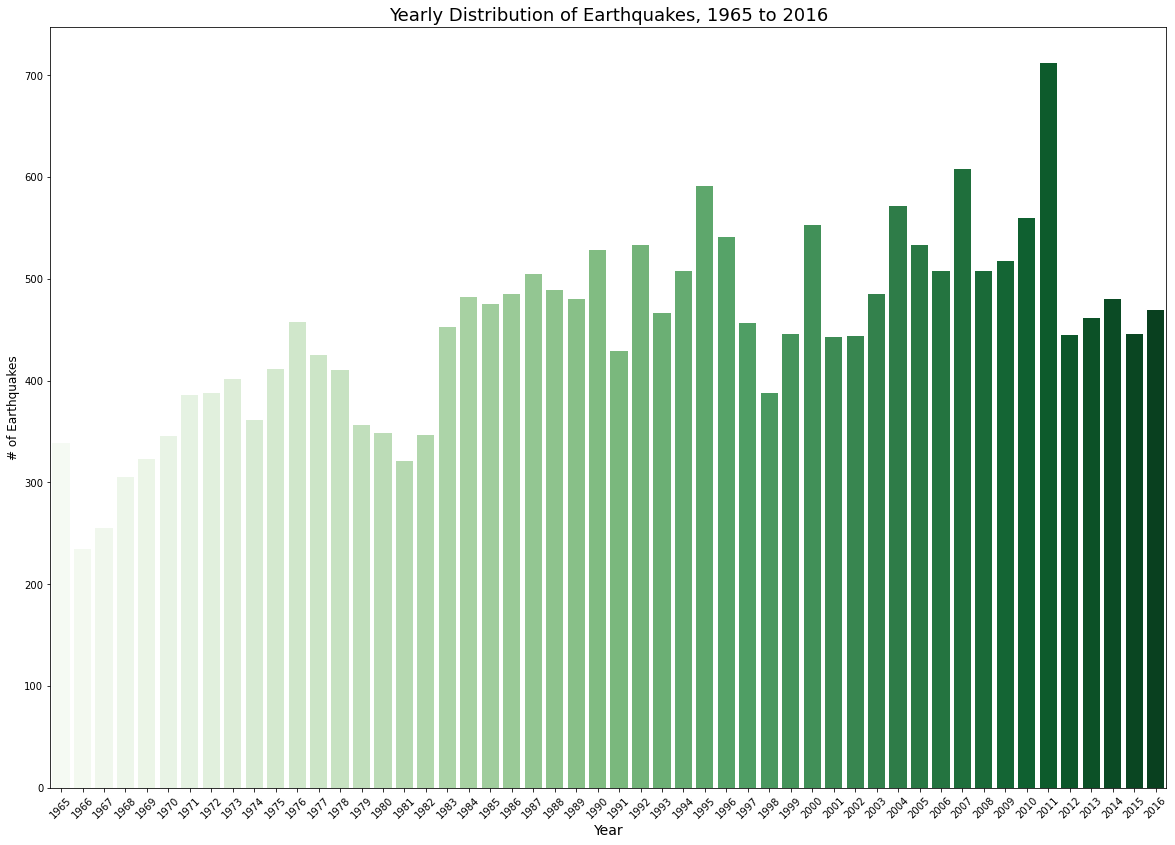

In [19]:
# Create a plot for earthquakes per year

# Sort the incidents by year
df_QUAKE6 = df_QUAKE5['Event Year'].value_counts() 
df_QUAKE6_YearIndex = df_QUAKE6.index 
df_QUAKE6_YearValues = df_QUAKE6.values

# Name axes for plotting
x = df_QUAKE6_YearIndex
y = df_QUAKE6_YearValues

# Plot the data for earthquakes by year
plt.figure(figsize=(20,14))
plt.title('Yearly Distribution of Earthquakes, 1965 to 2016', fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("# of Earthquakes", fontsize=12)
EarthquakePlot = sns.barplot(x = x[:60], y = y[:60], palette = 'Greens')
for item in EarthquakePlot.get_xticklabels():
    item.set_rotation(45)

We see a slight increase over time, but that may be due to better reporting and recording of seismic events. Let's look at the earthquake frequency by hour.

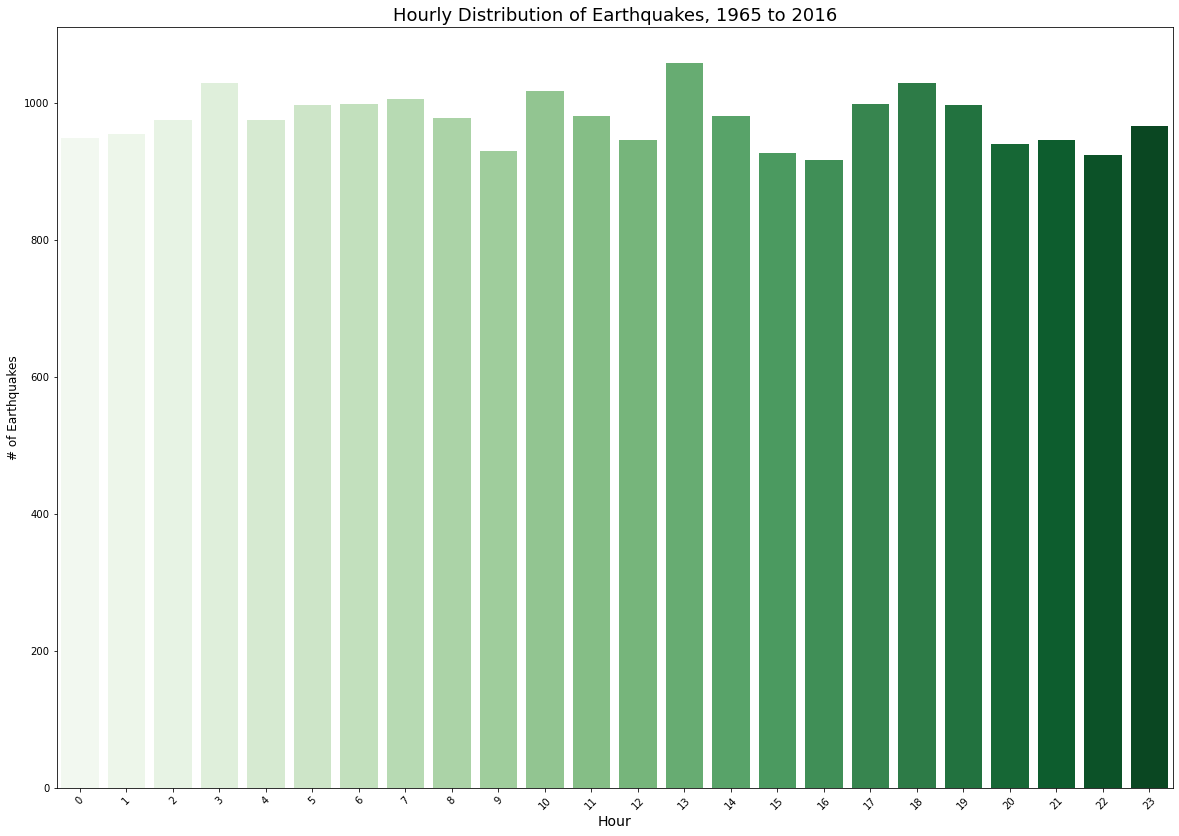

In [23]:
# Create a plot for earthquakes per hour

# Sort the incidents by hour
df_QUAKE7 = df_QUAKE5['Event Hour'].value_counts() 
df_QUAKE7_HourIndex = df_QUAKE7.index 
df_QUAKE7_HourValues = df_QUAKE7.values

# Name axes for plotting
x = df_QUAKE7_HourIndex
y = df_QUAKE7_HourValues

# Plot the data for earthquakes by month
plt.figure(figsize=(20,14))
plt.title('Hourly Distribution of Earthquakes, 1965 to 2016', fontsize=18)
plt.xlabel("Hour", fontsize=14)
plt.ylabel("# of Earthquakes", fontsize=12)
EarthquakePlot = sns.barplot(x = x, y = y, palette = 'Greens')
for item in EarthquakePlot.get_xticklabels():
    item.set_rotation(45)

As one might expect, the distribution is fairly random.

Next, let's see the distribution of magnitudes using a histogram.

Text(0.5, 1.0, 'Frequency vs. Magnitude of Earthquakes 1965-2016')

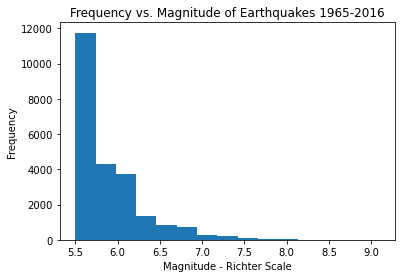

In [25]:
# Create a histogram showing budgets for the box office blockbuster dataset.
plt.hist(df_QUAKE5['Magnitude'], bins = 15)
plt.xlabel('Magnitude - Richter Scale')
plt.ylabel('Frequency')
plt.title('Frequency vs. Magnitude of Earthquakes 1965-2016')

As we can see, we get a nearly exponential drop off in magnitude from 5.5 to 6 and higher. Since the Richter scale is logarithmic (i.e. a 7.0 magnitude is about 100 times bigger than a 5.0 magnitude event).